In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

In [36]:
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [37]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [39]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [40]:
df.drop(columns=df.columns[2:5],inplace=True)

In [41]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [42]:
df.columns=["legitimate","context"]

In [43]:
df.tail()

,legitimate,context
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


Text(0.5, 1.0, 'legitimate Distribution')

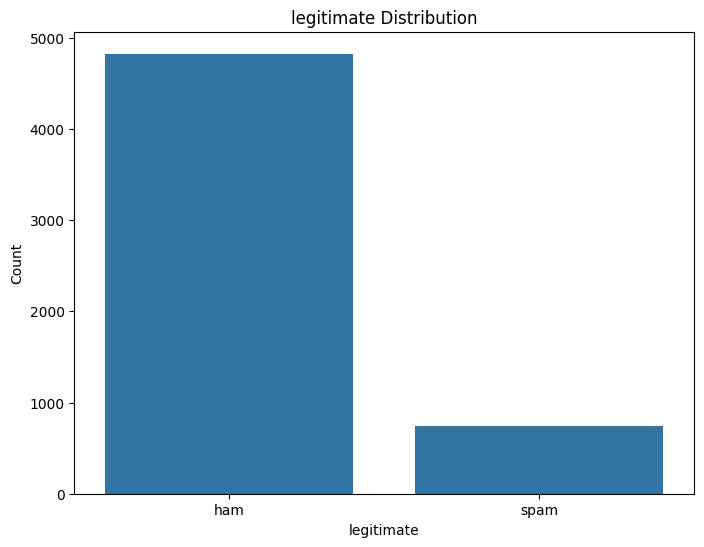

In [44]:
legitimate_counts = df['legitimate'].value_counts().reset_index()
legitimate_counts.columns = ['legitimate', 'Count']
pyplot.figure(figsize=(8, 6))
sns.barplot(x='legitimate', y='Count', data=legitimate_counts)
pyplot.xlabel('legitimate')
pyplot.ylabel('Count')
pyplot.title('legitimate Distribution')

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
df['context'].fillna("",inplace=True)
tf=TfidfVectorizer(stop_words='english', max_features=100000)
X_train = tf.fit_transform(df['context'])
label=LabelEncoder()
Y_train=label.fit_transform(df['legitimate'])

In [51]:
X_train

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>

In [52]:
Y_train

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=42,test_size=0.2)

In [55]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report
svc=LinearSVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print("Validation Accuracy:", accuracy_score(y_test, y_pred))
print("Validation Classification Report:\n", classification_report(y_test, y_pred))

Validation Accuracy: 0.9739910313901345
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.97      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [56]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, Y_train)

MultinomialNB()

In [58]:
Mnb_classifier.predict(x_test)

array([0, 0, 1, ..., 0, 0, 1])

In [59]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=500)
logistic.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [60]:
logistic.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
pretrained_model = Mnb_classifier
new_sentences = [
    "Your account have 100 debeted, is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML"
]

new_sentences_count = tf.transform(new_sentences)
predictions = pretrained_model.predict(new_sentences_count)

for sentence, prediction in zip(new_sentences, predictions):
    if prediction == 1:
        print(f"'{sentence}' is a spam message.")
    else:
        print(f"'{sentence}' is not a spam message.")

'Your account have 100 debeted, is waiting to be collected. Simply text the password \MIX" to 85069 to verify. Get Usher and Britney. FML' is a spam message.
